In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from seaborn import kdeplot
import numpy as np
import zipfile

In [2]:
import scipy.stats as sp
import patsy as pt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KernelDensity

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
pd.set_option('display.max_columns', None)

In [4]:
entrada = {'zipf': ['PNADC_012022_20220916', 'PNADC_022022_20220916','Dados_20170517', 
                    'Dicionario_e_input_20220224', 'Dicionarios_e_input_20170517'], 
          'subd': ['', '/Dicionários e input', '/Dados'], #SUBDIRETORIO
          'arq': ['dicionario_PNADC_microdados_trimestral', #Dicionarios
            'Dicionário de variáveis de pessoas - PNAD 2015',
            'Dicionário de variáveis de domicílios - PNAD 2015',
            'PNADC_012022', 'PNADC_022022', 'DOM2015', 'PES2015']}

In [5]:
def loadData(dicio, dados, n_fields=220, lastPos=3478):
    with zipfile.ZipFile(f'C:/DATASETS/IBGE/PNAD/{dicio[0]}.zip') as z:
        df_dict = pd.read_excel(z.open(f'{dicio[1]}{dicio[2]}.xls'), header=None, 
                              skiprows=4, dtype='string').dropna(how='all')[[0, 1, 2, 4, 5, 6]]

        sizes = df_dict[1][df_dict[1].str.isnumeric()].astype(int).values
        positions = df_dict[0][df_dict[0].str.isnumeric()].astype(int).values-1
        final_pos = [i[0]+i[1] for i in zip(positions, sizes)]
        final_pos[n_fields], final_pos = lastPos, final_pos[0:n_fields]
        tuples = list(zip(positions, final_pos))
    #dicionário de variáveis e tamanhos das colunas

    with zipfile.ZipFile(f'C:/DATASETS/IBGE/PNAD/{dados[0]}.zip') as z:
        pnad = pd.read_fwf(z.open(f'{dados[1]}{dados[2]}.txt'), 
                              colspecs=tuples, header=None, nrows=500000, dtype=str)

    df_dict.fillna(value=None, method='ffill', inplace=True)
    df_dict.set_index(2, inplace=True)
    df_dict.index = df_dict.index.str.lower()
    pnad.columns = list(df_dict.index.str.lower().dropna().unique()[0:n_fields]) #dataset carregado
    
    return pnad

In [6]:
pnad = loadData(dicio=[entrada['zipf'][3], entrada['subd'][0], entrada['arq'][0]], 
                dados=[entrada['zipf'][0], entrada['subd'][0], entrada['arq'][3]],
                n_fields=220, lastPos=3478)
pnad2 = loadData(dicio=[entrada['zipf'][3], entrada['subd'][0], entrada['arq'][0]], 
                dados=[entrada['zipf'][1], entrada['subd'][0], entrada['arq'][4]],
                n_fields=220, lastPos=3478)
pnad = pd.concat([pnad, pnad2])
del pnad2
pnad.reset_index(drop=True, inplace=True)

In [81]:
with zipfile.ZipFile(f"C:/DATASETS/IBGE/PNAD/{entrada['zipf'][3]}.zip") as z:
        df_dict = pd.read_excel(z.open(f"{entrada['subd'][0]}{entrada['arq'][0]}.xls"), header=None, 
                              skiprows=4, dtype='string').dropna(how='all')[[0, 1, 2, 4, 5, 6]]
df_dict[2].fillna(method='ffill', inplace=True)
df_dict.set_index(2, inplace=True)
df_dict.index = df_dict.index.str.lower()
df_dict[120:150]

,0,1,4,5,6
2,,,,,
v20081,98,2,Mês de nascimento,01 a 12,Mês
v20081,<NA>,<NA>,<NA>,99,Não informado
v20082,100,4,Ano de nascimento,Ano de referência menos 130 até ano de referência,Ano
v20082,<NA>,<NA>,<NA>,9999,Não informado
v2009,104,3,Idade do morador na data de referência,0 a 130,Idade (em anos)
v2010,107,1,Cor ou raça,1,Branca
v2010,<NA>,<NA>,<NA>,2,Preta
v2010,<NA>,<NA>,<NA>,3,Amarela
v2010,<NA>,<NA>,<NA>,4,Parda


In [7]:
def unique_labels(df, i, c):
        return i if c==df.columns[0] else None

In [43]:
def cat_dict(df, var): #substituir códigos pelo nome da categoria
    catDict = dict()
    for n, cat in enumerate(df_dict.loc[var][5]):
        catDict[cat] = df_dict.loc[var][6][n]
    return {var.lower(): catDict}[var]

In [9]:
def filtragem(df, grupo=dict()):

    filtros = list()
    for i in grupo.items():
        if type(i[1])==list:
            if i[1][-1]=='int':
                for n in i[1][:-1]:
                    filtros.append(((df[i[0]].dropna().astype(int)>=i[1][0])&(df[i[0]].dropna().astype(int)<=i[1][1])))
            elif i[1][-1]=='category':
                    filtros.append(pd.Series([x in i[1] for x in df[i[0]].dropna().astype('int32')]))
        else:
            filtros.append((df[i[0]]==i[1]))
    
    mask = filtros[0]
    for i in filtros:
        mask = mask&i
    
    return mask

In [10]:
def plot_distribution(df, var=str(), var_cross=dict(), bins=7, remove_cats=list(), density=False, n=2, save=False, name=''):
    ax, fig = plt.subplots(figsize=(12,6), facecolor='#063e58')
    
    keys = list(var_cross.keys())+[var]
    filtro = filtragem(df,var_cross)
    df = df[filtro][keys]
    
    for i in df[keys[n]].unique():
        fig.hist(df[df[keys[n]]==i][var].astype(int), 
                 alpha=1/len(df[keys[n]].unique()), density=density, bins=bins)
    
    plt.ylabel('Frequência'), plt.xlabel('Anos estudados')
    ax2 = ax.gca().twinx()
    
    for i in df[keys[n]].unique():
        kdeplot(df[df[keys[n]]==i][var].astype(int),
                label=cat_dict(df_dict, keys[n])[str(i)])
    
    plt.title(f'Anos estudados por {keys[n]} | {len(df)} observações')
    fig.set_facecolor('#063e58')
    ax2.set_ylabel('Densidade')
    plt.legend()
    plt.show()
    
    if save:
        plt.savefig(f'graficos/distribuicao_{var}_{name}.png')

In [11]:
def amostragem(df, y='vd3005', grupoA=dict(), grupoB=dict()):
    global var
    var = y
    cols = list(grupoA.keys())
    dfA = df[filtragem(df, grupo=grupoA)][cols+['upa', 'estrato', 'v1008', var]]
    dfB = df[filtragem(df, grupo=grupoB)][cols+['upa', 'estrato', 'v1008', var]]
    return dfA, dfB

In [12]:
def moradores_mesmo_domicilio(dfA, dfB, pareado=False):
    for i in [dfA, dfB]: #unificando campos que identificam domicílios em uma primary key
        i['key'] = i['upa']+i['estrato']+i['v1008']
        i.drop(['upa','estrato','v1008'], axis=1, inplace=True)

    df_ab = dfA.merge(dfB, on='key', suffixes=['_r', '_f'])
    
    if pareado:
        series = list()
        columns = [x for x in df_ab.columns if x[-2:]!='_f']
    
        for col in columns:
            if col!='key':
                s = pd.concat([df_ab[col], df_ab[col[:-2]+'_f']]) #concatenando em uma série as variáveis
                series.append(s)
            else:
                s = pd.concat([df_ab[col], df_ab[col]])
                series.append(s)

        df_ab = pd.concat(series, axis=1, ignore_index=True)
        df_ab.columns = [x[:-2] if x[-2:]=='_r' else x for x in columns]

        return df_ab.drop_duplicates().reset_index(drop=True)
    
    else:
        return df_ab

In [13]:
def discretize(df, var, n_bins=4):
    n_cats = np.linspace(0, df[var].dropna().astype(int).max(), n_bins)
    labels= [str(int(x//1))+'a'+str(int(n_cats[n+1]//1)) for n, x in enumerate(n_cats) if x!=max(n_cats)]
    df[var+'_c'] = pd.cut(df[var].dropna().astype(int), bins=n_cats, labels=labels, include_lowest=True)
    
    return df

In [14]:
def plot_contingencyBar(df, cats, var, normalize):
    
    XvsY = pd.crosstab(df[cats], df[var], normalize=normalize)
    
    ax, fig = plt.subplots(figsize=(12,6), facecolor='#063e58')
    color_list = list(matplotlib.colors.cnames)
    nv, nc = len(XvsY.columns), len(XvsY.index)
    width = 1
    dist = 0
    cluster = -1
    place_labels = [[],[]]
    for col in XvsY.columns:
        color = 10
        cluster += 1
        for ind in XvsY.index:
            place_labels[0].append(cluster+dist)
            place_labels[1].append(ind)
            chart = plt.bar(cluster+dist, round(XvsY.loc[ind, col]*100, 2), width=width, color=color_list[color], 
                            label=unique_labels(XvsY, ind, col))
            dist+=width
            color+=1
            plt.bar_label(chart, label_type='center')
    plt.title(f'{var} x {cats} | normalização: {normalize} | n observações: {len(df)}')
    fig.set_facecolor('#063e58')
    plt.xticks(place_labels[0], place_labels[1], rotation=45)
    plt.ylabel('%', y=0.95)
    plt.legend()
    
    plt.show()

In [15]:
def cruzamento_2variaveis(df, group, var, var_2, normalize='columns', save=False):
    check_zeros = lambda x : '' if x==0 else x
    
    XvsYZ = pd.crosstab([amostra[var], amostra[var_2]], amostra[group], normalize=normalize)
    ng = len(XvsYZ.columns)
    nv = len(XvsYZ.index.get_level_values(0))
    nv2 = len(XvsYZ.index.get_level_values(1))
    ax, fig = plt.subplots(figsize=(12,6), facecolor='#063e58')
    color_list = list(matplotlib.colors.cnames)
    
    leg, dist = True, 0
    place_labels = [[],[]]
    for col in XvsYZ.columns:
        for ind in XvsYZ.index.get_level_values(0).unique():
            place_labels[0].append(dist)
            place_labels[1].append(ind)
            bottom = 0
            color = 11
            for i in XvsYZ.index.get_level_values(1).unique():
                chart = (fig.bar(dist, round(XvsYZ.loc[ind, col][i]*100, 2), bottom=bottom, width=1, 
                                 color=color_list[color], label= cat_dict(df_dict, var_2)[i] if leg==True else ''))
                plt.bar_label(chart, label_type='center')
                bottom += round(XvsYZ.loc[ind, col][i]*100, 2)
                color += 1
            dist+=1
            leg = False
        dist+=1
    
    plt.ylabel('%', y=0.95)
    newax = ax.gca().twiny()
    newax.bar(place_labels[0], [0]*len(place_labels[0]))
    newax.set_frame_on(True)
    newax.xaxis.set_ticks_position('bottom')
    newax.xaxis.set_label_position('bottom')
    newax.spines['bottom'].set_position(('outward', 40))

    cut = int(np.floor(len(place_labels[0])/2))
    plt.title(f'Anos estudados de pais e filhos por sexo | normalização: {normalize} | n observações: {len(df)}')
    fig.legend()
    fig.set_facecolor('#063e58')
    fig.set_xticks(place_labels[0], place_labels[1], rotation=45)
    newax.set_xticks([np.median(place_labels[0][:cut])]+[np.median(place_labels[0][cut:])], ['Responsáveis', 'Filhos'])
    newax.set_xlabel('Grupos')
    plt.show()
    
    if save:
        plt.savefig(f'graficos/distribuicao_anos_est_{var}_{var_2}.png')

### Selecionando a amostra

In [16]:
a={'v2005':[1, 'category'], 'v2009':[25, 130,'int'], 'v2010': [1, 2, 4, 'category'], 'v2007': [1, 2, 'category']} #responsáveis
b={'v2005':[4, 5, 'category'], 'v2009':[25, 130,'int'], 'v2010': [1, 2, 4, 'category'], 'v2007': [1, 2, 'category']} ##filhos

In [17]:
c = {'v2005':[1, 4, 'category'], 'v2009': [20, 40, 'int'], 'v2007': [1, 2, 'category'], 'v2010': [1, 2, 3, 4, 'category']}

In [20]:
amostra = pnad.pipe(amostragem, grupoA=a, grupoB=b, y='vd3005')[0]\
    .pipe(moradores_mesmo_domicilio, amostragem(pnad, grupoA=a, grupoB=b, y='vd3005')[1], pareado=True)\
    .pipe(discretize, 'vd3005', n_bins=6)

In [33]:
amostra['v2005'] = amostra['v2005'].apply(lambda x : '01' if x=='01' else '04')

### Plotando gráficos

In [34]:
amostra.head()

,v2005,v2009,v2010,v2007,vd3005,key,vd3005_c
0,01,045,2,2,10,110000016111001102,9a12
1,01,053,1,2,12,110000016111001113,9a12
2,01,056,4,2,11,110000016111001114,9a12
3,01,057,4,2,11,110000016111001114,9a12
4,01,076,4,2,05,110000052115201207,3a6


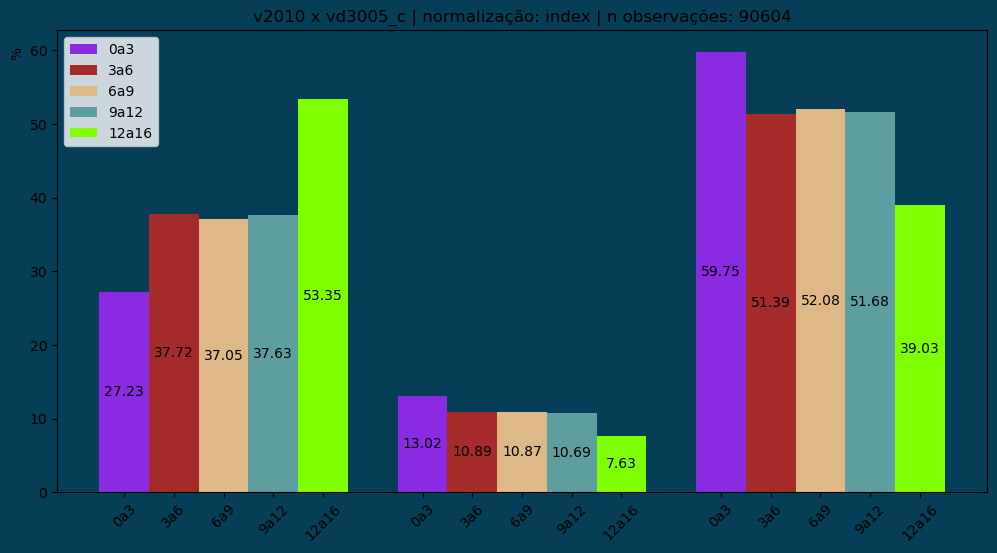

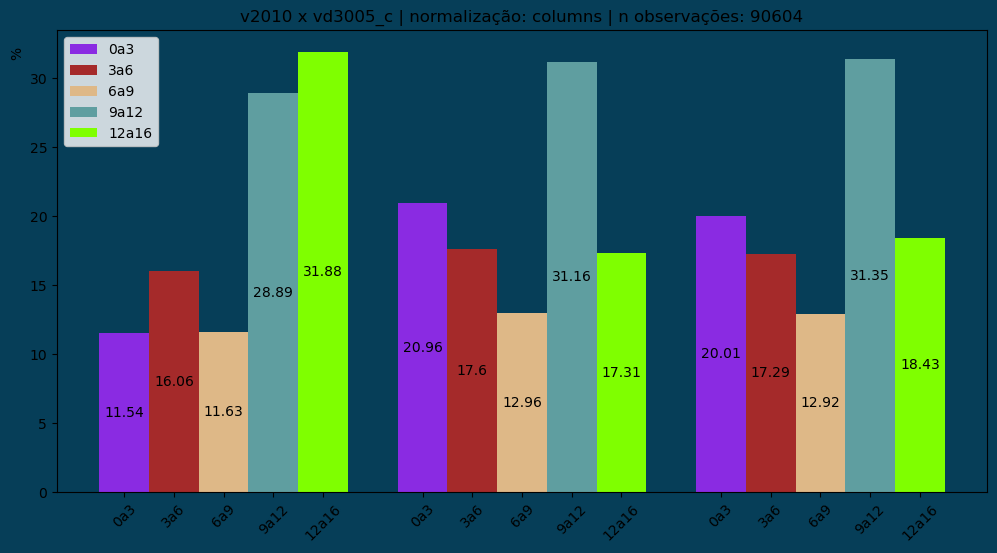

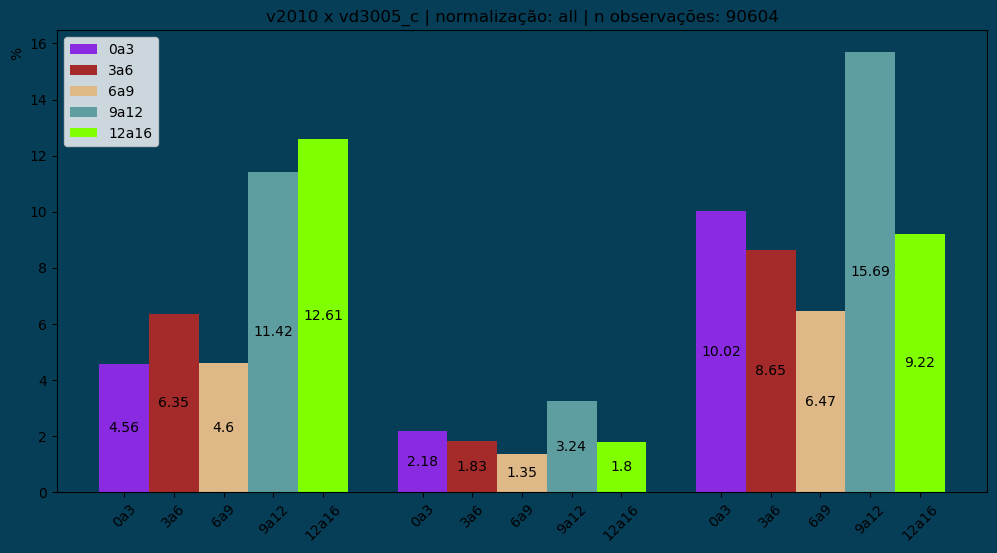

In [35]:
for p in ['index','columns', 'all']:
    plot_contingencyBar(amostra, cats='vd3005_c', var='v2010', normalize=p)

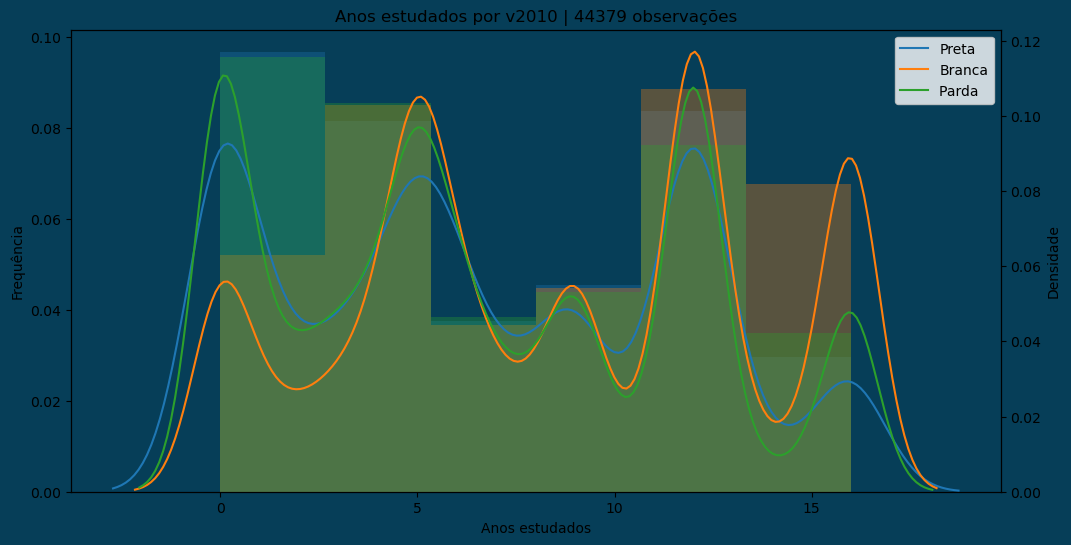

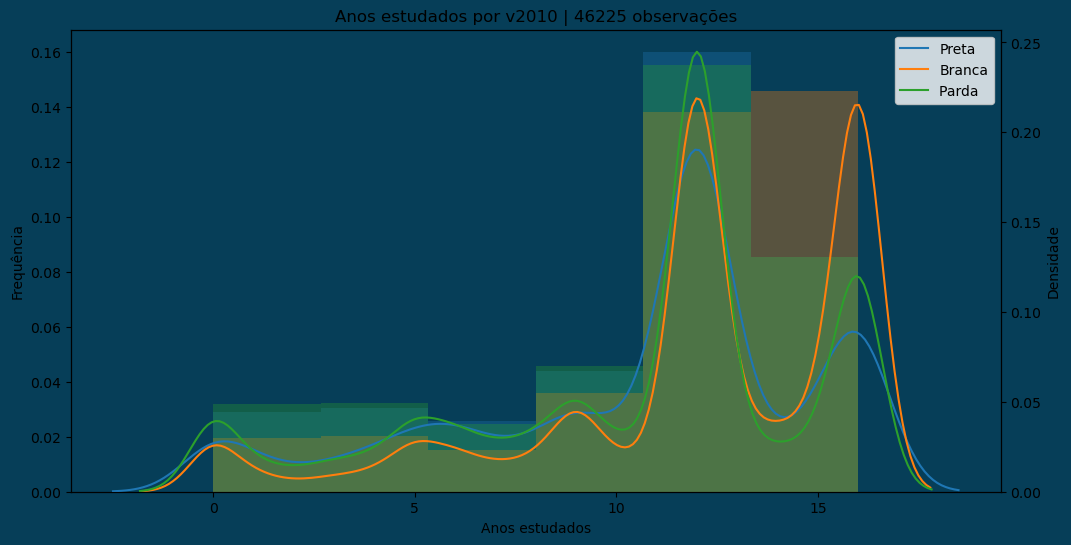

In [49]:
for d in [a, b]:
    plot_distribution(amostra, var='vd3005', var_cross=d, bins=6, density=True, n=2, save=False, name=d['v2005'][0])

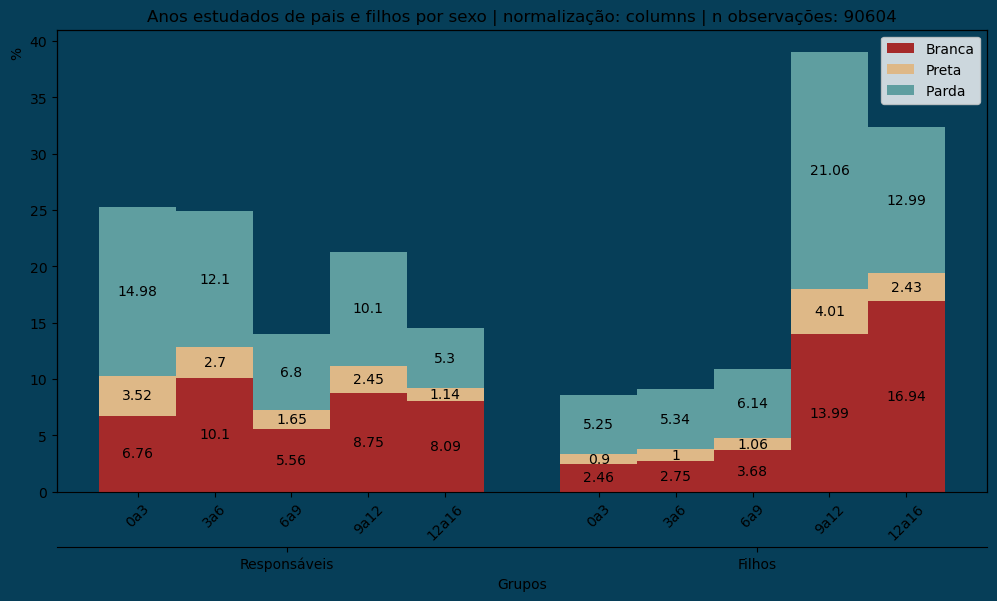

In [50]:
cruzamento_2variaveis(amostra, group='v2005', var='vd3005_c', var_2='v2010', normalize='columns', save=False)

In [51]:
amostra = pnad.pipe(amostragem, grupoA=a, grupoB=b, y='vd3005')[0]\
    .pipe(moradores_mesmo_domicilio, amostragem(pnad, grupoA=a, grupoB=b, y='vd3005')[1], pareado=False)\
    #.pipe(discretize, 'vd3005_r', n_bins=6)

In [52]:
amostra['vd3005_f'] = amostra['vd3005_f'].astype(int)
amostra['vd3005_r'] = amostra['vd3005_r'].astype(int)

In [53]:
amostra.columns

Index(['v2005_r', 'v2009_r', 'v2010_r', 'v2007_r', 'vd3005_r', 'key',
       'v2005_f', 'v2009_f', 'v2010_f', 'v2007_f', 'vd3005_f'],
      dtype='object')

In [54]:
amostra = amostra.groupby('key').mean()
amostra.reset_index(inplace=True)

In [55]:
amostra.head()

,key,vd3005_r,vd3005_f
0,110000016111001102,10.0,10.0
1,110000016111001113,12.0,16.0
2,110000016111001114,11.0,16.0
3,110000052115201207,5.0,10.5
4,110000070115201211,5.0,12.0


In [56]:
amostra = discretize(amostra, 'vd3005_r', n_bins=5)

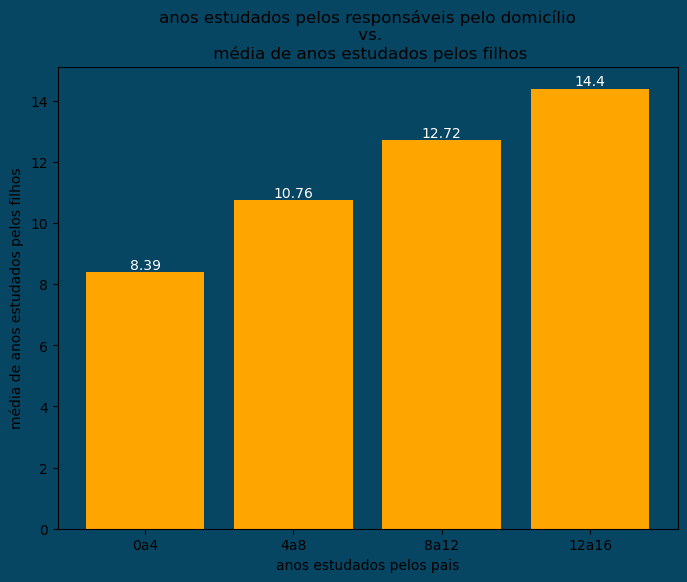

In [57]:
ax, fig = plt.subplots(figsize=(8,6), facecolor='#074663')
fig.set_facecolor('#074663')
for i in ['0a4', '4a8','8a12', '12a16']:
    chart = (plt.bar(i, round(amostra[(amostra['vd3005_r_c']==i)
#                                                  &
#                                      (amostra['v2010_f']=='1')
                                         ]['vd3005_f'].astype(int).mean(), 2), color='orange'))
    plt.bar_label(chart, label_type='edge', color='white')

plt.title('anos estudados pelos responsáveis pelo domicílio\n vs.\n média de anos estudados pelos filhos')
plt.ylabel('média de anos estudados pelos filhos')
plt.xlabel('anos estudados pelos pais')
#plt.xticks([0, 1, 2, 3], ['0a4', '5a8', '9a12', '13a16'])
plt.show()

In [58]:
means = list()
for i in ['0a4','4a8', '8a12' , '12a16']:
    means.append(amostra[amostra['vd3005_r_c']==i]['vd3005_f'].astype(int).mean())

In [59]:
print(means)
np.mean([x-means[n-1] for n, x in enumerate(means) if n!=0])

[8.387014575476506, 10.756907931535967, 12.719555555555555, 14.40281882245965]


2.005268082327715

In [ ]:
amostra[['v2005_r', 'vd3005_r_c', 'key',
       'v2005_f', 'vd3005_f']].rename(columns={'v2005_r':'responsável', 'vd3005_r_c':'anos_estudados_responsavel',
                                      'v2005_f':'filho', 'vd3005_f':'anos_estudados_filho'}).\
                replace({'4a8': '5a8', '8a12':'9a12', '12a16':'13a16'})

### Exclusão escolar

In [61]:
pnad.insert(0, 'key', pnad['upa']+pnad['estrato']+pnad['v1008'])
#pnad.drop(['upa', 'estrato', 'v1008'], axis=1, inplace=True)

In [82]:
exclusao = pnad[(pnad['v2009'].astype(int)>4)&(pnad['v2009'].astype(int)<18)
         &([x not in ['5', '6', '7'] for x in pnad['vd3004']])
         &(pnad['v2010']!='9')     
               ][['key', 'uf', 'v3002', 'v2009', 'v2007', 'v2010', 'v4001', 'v4002']]
exclusao['trabalha'] = ['1' if x[0]=='1' or x[1]=='1' else '2' for x in zip(exclusao['v4001'], exclusao['v4002'])]
exclusao['v2010'] = ['outros' if x=='3' or x=='5' else x for x in exclusao['v2010']]
exclusao.reset_index(drop=True, inplace=True)

In [83]:
pnad['v403312'] = pnad['v403312'].dropna().astype(int)
renda_dom = pnad[['key', 'v403312']].groupby('key').sum()

exclusao = exclusao.merge(renda_dom, on='key', how='left')

exclusao['v403312_c'] = pd.cut(exclusao['v403312'], bins=[0, 606, 1212, 2424, 3636, 6060, 12120, 24240, 500000],
                                                    labels=['1', '2', '3', '4', '5', '6', '7', '8'])

In [84]:
exclusao_desag = exclusao.groupby(['v403312_c', 'v2010', 'v2007', 'v3002']).count()[['key']]

for obs1 in exclusao_desag.index.get_level_values(0).unique():
    for obs2 in exclusao_desag.index.get_level_values(1).unique():
        for obs3 in exclusao_desag.index.get_level_values(2).unique():
            print(f'--{obs1}--{obs2}--{obs3}--')
            for obs4 in exclusao_desag.index.get_level_values(3).unique():
                print(str(obs4), round((exclusao_desag.loc[obs1].loc[obs2].loc[obs3].loc[obs4]
                                /
                exclusao_desag.loc[obs1].loc[obs2].loc[obs3].sum()) * 100, 2).values)

--1--1--1--
1 [96.15]
2 [3.85]
--1--1--2--
1 [96.48]
2 [3.52]
--1--2--1--
1 [96.21]
2 [3.79]
--1--2--2--
1 [97.82]
2 [2.18]
--1--4--1--
1 [96.43]
2 [3.57]
--1--4--2--
1 [96.93]
2 [3.07]
--1--outros--1--
1 [93.15]
2 [6.85]
--1--outros--2--
1 [93.68]
2 [6.32]
--2--1--1--
1 [96.13]
2 [3.87]
--2--1--2--
1 [96.87]
2 [3.13]
--2--2--1--
1 [96.27]
2 [3.73]
--2--2--2--
1 [96.83]
2 [3.17]
--2--4--1--
1 [95.88]
2 [4.12]
--2--4--2--
1 [96.72]
2 [3.28]
--2--outros--1--
1 [96.51]
2 [3.49]
--2--outros--2--
1 [92.]
2 [8.]
--3--1--1--
1 [97.06]
2 [2.94]
--3--1--2--
1 [96.96]
2 [3.04]
--3--2--1--
1 [96.47]
2 [3.53]
--3--2--2--
1 [97.26]
2 [2.74]
--3--4--1--
1 [96.38]
2 [3.62]
--3--4--2--
1 [96.87]
2 [3.13]
--3--outros--1--
1 [93.06]
2 [6.94]
--3--outros--2--
1 [89.92]
2 [10.08]
--4--1--1--
1 [97.27]
2 [2.73]
--4--1--2--
1 [97.79]
2 [2.21]
--4--2--1--
1 [96.53]
2 [3.47]
--4--2--2--
1 [96.88]
2 [3.12]
--4--4--1--
1 [97.16]
2 [2.84]
--4--4--2--
1 [97.41]
2 [2.59]
--4--outros--1--
1 [96.3]
2 [3.7]
--4--outr

In [85]:
exclusao['regiao'] = exclusao['uf'].apply(lambda x: 
               'norte' if x[0]=='1' else
               'nordeste' if x[0]=='2' else
                'sudeste' if x[0]=='3' else
                'centro-oeste' if x[0]=='4' else
                'sul')

In [86]:
ct = pd.crosstab(exclusao[(exclusao['v2009'].astype(int)>=14)]['v3002'], 
            [exclusao[(exclusao['v2009'].astype(int)>=14)]['v2010'],
             exclusao[(exclusao['v2009'].astype(int)>=14)]['v2007'], 
             exclusao[(exclusao['v2009'].astype(int)>=14)]['trabalha'].rename('v4001')],
              normalize='columns', colnames=['cor','gênero','trabalha'], rownames=['frequenta escola'])\
                                                    .rename(cat_dict(df_dict, 'v2010'), axis=1, level=0)\
                                                    .rename(cat_dict(df_dict, 'v2007'), axis=1, level=1)\
                                                    .rename(cat_dict(df_dict, 'v4001'), axis=1)\
                                                    .rename(cat_dict(df_dict, 'v3002'))

In [87]:
#cruzamento das variáveis cor/raça; gênero; trabalho

ct

cor              Branca                                   Preta            \
gênero            Homem              Mulher               Homem             
trabalha            Sim      Não        Sim      Não        Sim      Não    
frequenta escola                                                            
Sim               0.861  0.968004  0.968391  0.969378  0.845588  0.946618   
Não               0.139  0.031996  0.031609  0.030622  0.154412  0.053382   

cor                                     Parda                                 \
gênero              Mulher               Homem              Mulher             
trabalha               Sim      Não        Sim      Não        Sim      Não    
frequenta escola                                                               
Sim               0.920354  0.955796  0.813096  0.956274  0.912932  0.953175   
Não               0.079646  0.044204  0.186904  0.043726  0.087068  0.046825   

cor                 outros                                
gênero               Homem              Mulher            
trabalha               Sim      Não        Sim      Não   
frequenta escola                                          
Sim               0.684211  0.945378  0.833333  0.911647  
Não               0.315789  0.054622  0.166667  0.088353

In [88]:
#cruzamento das variáveis cor/raça; gênero; renda

pd.crosstab(exclusao['v3002'], 
            [exclusao['v2010'],
             exclusao['v2007'], 
             exclusao['v403312_c'].rename('v403312')], normalize='columns',
             colnames=['cor','gênero','renda familiar'], rownames=['frequenta escola'])\
                                .rename(cat_dict(df_dict, 'v2010'), axis=1, level=0)\
                                .rename(cat_dict(df_dict, 'v2007'), axis=1, level=1)\
                                .rename(cat_dict(df_dict, 'v403312'), axis=1)\
                                .rename(cat_dict(df_dict, 'v3002')) * 100

cor                  Branca                                             \
gênero                Homem                                              
renda familiar            1          2         3          4          5   
frequenta escola                                                         
Sim               96.150762  96.126761  97.05725  97.271557  97.969292   
Não                3.849238   3.873239   2.94275   2.728443   2.030708   

cor                                                                     \
gênero                                               Mulher              
renda familiar            6          7          8         1          2   
frequenta escola                                                         
Sim               98.591355  99.216867  99.498747  96.47541  96.873191   
Não                1.408645   0.783133   0.501253   3.52459   3.126809   

cor                                                                      \
gênero                                                                    
renda familiar            3          4          5          6          7   
frequenta escola                                                          
Sim               96.960227  97.793326  98.317141  98.970119  99.234303   
Não                3.039773   2.206674   1.682859   1.029881   0.765697   

cor                              Preta                                   \
gênero                           Homem                                    
renda familiar            8          1          2          3          4   
frequenta escola                                                          
Sim               99.728445  96.213425  96.268657  96.465517  96.526508   
Não                0.271555   3.786575   3.731343   3.534483   3.473492   

cor                                                                      \
gênero                                                           Mulher   
renda familiar            5          6          7          8          1   
frequenta escola                                                          
Sim               97.519247  97.399783  97.863248  97.101449  97.821351   
Não                2.480753   2.600217   2.136752   2.898551   2.178649   

cor                                                                      \
gênero                                                                    
renda familiar            2          3          4          5          6   
frequenta escola                                                          
Sim               96.825397  97.264151  96.878364  98.106713  98.945148   
Não                3.174603   2.735849   3.121636   1.893287   1.054852   

cor                                    Parda                                   \
gênero                                  Homem                                   
renda familiar            7      8          1          2          3         4   
frequenta escola                                                                
Sim               99.130435  100.0  96.430206  95.877458  96.383242  97.16041   
Não                0.869565    0.0   3.569794   4.122542   3.616758   2.83959   

cor                                                                     \
gênero                                                          Mulher   
renda familiar            5          6          7          8         1   
frequenta escola                                                         
Sim               97.467037  97.874752  98.661378  99.029126  96.93378   
Não                2.532963   2.125248   1.338622   0.970874   3.06622   

cor                                                                      \
gênero                                                                    
renda familiar            2          3          4          5          6   
frequenta escola                                                          
Sim               96.717019  96.865434  97.413415  97.439722  98.747327   

In [89]:
pd.crosstab(exclusao['v3002'], 
            [exclusao['v2010'],
             exclusao['v2007'], 
             exclusao['regiao']], normalize='columns',
             colnames=['cor','gênero','região'], rownames=['frequenta escola'])\
                                .rename(cat_dict(df_dict, 'v2010'), axis=1, level=0)\
                                .rename(cat_dict(df_dict, 'v2007'), axis=1, level=1)\
                                .rename(cat_dict(df_dict, 'v3002')) * 100

cor                    Branca                                            \
gênero                  Homem                                             
região           centro-oeste   nordeste     norte    sudeste       sul   
frequenta escola                                                          
Sim                 98.048269  97.250631  97.61263  98.274232  97.65808   
Não                  1.951731   2.749369   2.38737   1.725768   2.34192   

cor                                                                        \
gênero                 Mulher                                               
região           centro-oeste   nordeste      norte    sudeste        sul   
frequenta escola                                                            
Sim                 98.553163  97.729502  96.890221  98.668803  98.146877   
Não                  1.446837   2.270498   3.109779   1.331197   1.853123   

cor                     Preta                                              \
gênero                  Homem                                               
região           centro-oeste   nordeste      norte    sudeste        sul   
frequenta escola                                                            
Sim                 95.289079  97.136944  95.918367  97.204301  97.208539   
Não                  4.710921   2.863056   4.081633   2.795699   2.791461   

cor                                                                       \
gênero                 Mulher                                              
região           centro-oeste   nordeste     norte    sudeste        sul   
frequenta escola                                                           
Sim                 98.858447  97.606701  96.83908  97.917808  98.421053   
Não                  1.141553   2.393299   3.16092   2.082192   1.578947   

cor                    Parda                                              \
gênero                  Homem                                              
região           centro-oeste  nordeste      norte    sudeste        sul   
frequenta escola                                                           
Sim                 96.593442  97.32892  95.678356  97.993421  96.914195   
Não                  3.406558   2.67108   4.321644   2.006579   3.085805   

cor                                                                        \
gênero                 Mulher                                               
região           centro-oeste   nordeste      norte    sudeste        sul   
frequenta escola                                                            
Sim                 97.133333  97.698413  96.392568  98.214069  97.456744   
Não                  2.866667   2.301587   3.607432   1.785931   2.543256   

cor                    outros                                              \
gênero                  Homem                                               
região           centro-oeste   nordeste      norte    sudeste        sul   
frequenta escola                                                            
Sim                    96.875  95.689655  95.238095  97.692308  98.701299   
Não                     3.125   4.310345   4.761905   2.307692   1.298701   

cor                                                                       
gênero                 Mulher                                             
região           centro-oeste  nordeste      norte    sudeste        sul  
frequenta escola                                                          
Sim                     100.0  95.27897  92.727273  96.551724  95.049505  
Não                       0.0   4.72103   7.272727   3.448276   4.950495